<a href="https://colab.research.google.com/github/SamPetkov/PartialCoalescence/blob/main/InternalDiameterDroplet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

Constants + Time variables

In [ ]:
#Constants
sigma12 = 22e-3
rho_l = 786.
Mu_l = 0.00105

D0 = 1.07e-3
Oh0 = Mu_l/np.sqrt(rho_l*sigma12*D0)


TAU = np.sqrt((rho_l*D0**(3))/(sigma12))
V0 = np.pi/6

#Results
Di = np.array([0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.56,0.57,0.58,0.59,0.59125,0.5925,0.59375,0.595])*D0
# no pinch off for D = 0.1
t_pinch_off_D = np.array([0.551,0.551, 0.551,0.551,0.549,0.548,0.544,0.540,0.535,0.531,0.528,0.533,0.541,0.587,0.569,0.587,0.590,0.601,0.609,0.643])
## for .57 it is ready to pinch off at around 547 but a capillary waves jerks it upward
t_pinch_off_SI = t_pinch_off_D*TAU


Diameter ratio

In [ ]:
V_daughter = np.array([0.105545,0.106315,0.10583,0.10563,0.105111,0.103941,0.10414,0.103321,0.102482,0.100689,0.0976142,0.0906251,0.0884968,0.0851081, 0.0817734,0.0787614,0.0781474,0.0776454,0.0768933,0.0779671])
V_Deka = np.array([])
# Note - for gird level 10 we fractional pixels have a substantial effect on the volume calculaed
V = V0*(1-(Di/D0)**3)
D_daughter = np.cbrt(V_daughter/V[:len(V_daughter)])

d_Oh = np.cbrt(1-(3/8)*(Oh0+np.sqrt(Oh0**2+4)))


In [ ]:
print(Oh0)
print(D_daughter[0])
print(d_Oh)
print(len(V_daughter))
print(len(Di))

0.0077192444958885924
0.586335712951008
0.6275149413781771
17
17


In [ ]:
print(D_daughter )
print(t_pinch_off_D)
print(t_pinch_off_SI)

[0.58633571 0.58778262 0.58705875 0.58715436 0.58710074 0.58642062
 0.58907244 0.59075459 0.59355054 0.59588129 0.59726735 0.5921427
 0.58965746 0.58430442 0.57892992 0.57418466 0.57351763]
[0.551 0.551 0.551 0.551 0.549 0.548 0.544 0.54  0.535 0.531 0.528 0.533
 0.541 0.587 0.569 0.587 0.643]
[0.00364525 0.00364525 0.00364525 0.00364525 0.00363202 0.0036254
 0.00359894 0.00357248 0.0035394  0.00351294 0.00349309 0.00352617
 0.00357909 0.00388341 0.00376433 0.00388341 0.00425389]


In [ ]:
error_from_frame_selection = 0.001/(np.sqrt(3)*0.551)

error graphs

 tp

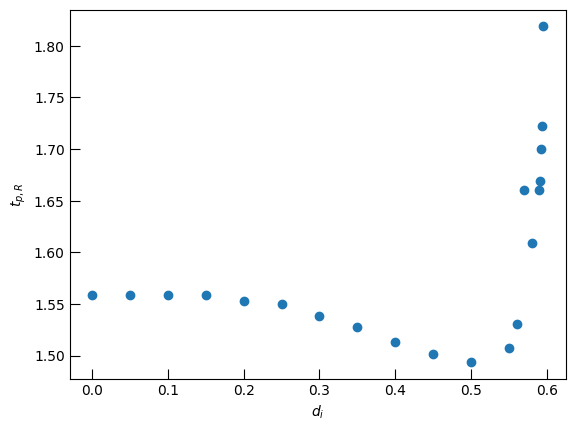

In [ ]:
# prompt: create a log-log plot of the dependence of t_pinch_off_D on D add a linear regression fit to the model

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress



# Create the plot
plt.figure()
plt.plot(Di[:len(t_pinch_off_D)]/D0, t_pinch_off_D*2**(3/2), 'o', label='Data')

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 10 # Adjust font size
plt.rcParams['axes.labelsize'] = 14  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

plt.xlabel('$d_i$')
plt.ylabel('$t_{p,R}$')
plt.grid(False)
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')

plt.show()

# print(f"Linear regression slope: {slope:.4f}")
# print(f"Linear regression intercept: {intercept:.4f}")
# print(f"R-squared: {r_value**2:.4f}")

tp corrected deka

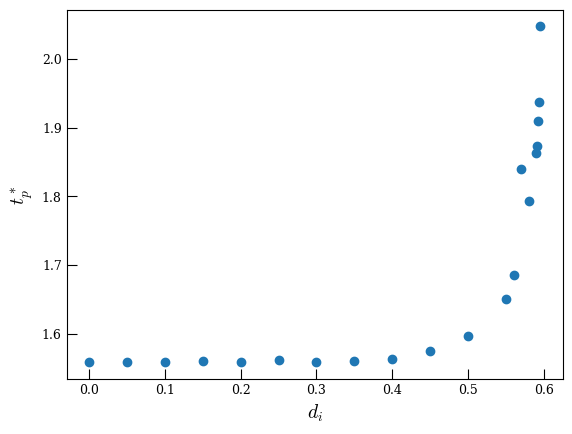

In [ ]:
# prompt: create a log-log plot of the dependence of t_pinch_off_D on D add a linear regression fit to the model

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress



# Create the plot
plt.figure()
plt.plot(Di[:len(t_pinch_off_D)]/D0, t_pinch_off_D*2**(3/2)/(np.sqrt((1-(Di/D0)**3))), 'o', label='Data')

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 12 # Adjust font size
plt.rcParams['axes.labelsize'] = 16  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 18

plt.xlabel('$d_i$')
plt.ylabel('$t_p^*$')
plt.grid(False)
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')

plt.savefig('t_pinch_off_D_vs_D.pdf')
plt.show()

# print(f"Linear regression slope: {slope:.4f}")
# print(f"Linear regression intercept: {intercept:.4f}")
# print(f"R-squared: {r_value**2:.4f}")

d di

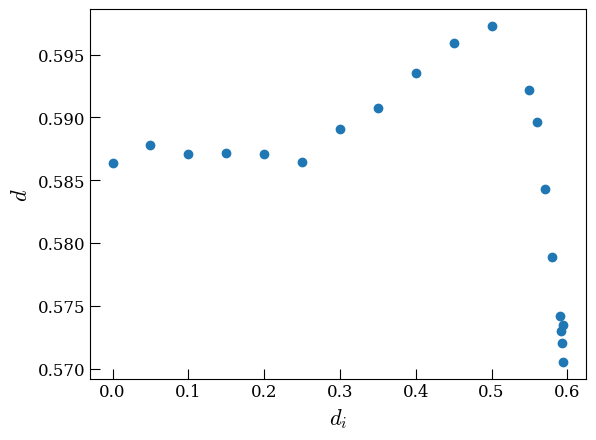

In [ ]:
# prompt: create the matplot lib of D-daughter against Oh with points and draw the graph of d_Oh against Oh with continuos lines on the same graph start all arrays from index 2

import matplotlib.pyplot as plt
plt.figure()
plt.plot(Di[:len(D_daughter)]/D0, D_daughter, 'o', label='D_daughter')

#Style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Computer Modern Roman'] # Better font
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern fonts for math
plt.rcParams['font.size'] = 12 # Adjust font size
plt.rcParams['axes.labelsize'] = 16  # Increased label size
plt.rcParams['axes.labelweight'] = 'bold' # Made labels bold
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 18
plt.tick_params(which='major', length=7, direction='in')
plt.tick_params(which='minor', length=4, direction='in')

plt.xlabel('$d_i$')
plt.ylabel('$d$')
plt.grid(False)
plt.savefig('di_d.pdf')
plt.show()

Interface generator



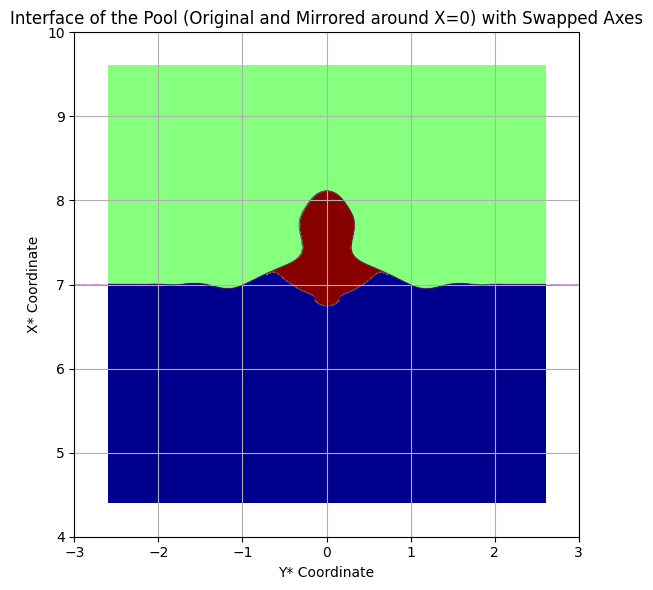

In [ ]:
file_path = '/content/INterface/10/drop_t_00.354.dat'  # your file location
background_image = '/content/INterface/10/time-00.354.png' # your image location

# Read the file and extract segments
segments = []
current_segment = []

with open(file_path, 'r') as file:
    for line in file:
        stripped = line.strip()
        if not stripped:
            if current_segment:
                segments.append(current_segment)
                current_segment = []
        else:
            try:
                x, y = map(float, stripped.split())
                current_segment.append((x, y))
            except ValueError:
                continue

# Append the last segment if it exists
if current_segment:
    segments.append(current_segment)

# Plot the segments
plt.figure(figsize=(8, 6))
for segment in segments:
    xs, ys = zip(*segment)
    # Plot original segment with swapped x and y
    plt.plot(ys, xs, color='purple', linewidth=.25)

    # Mirror the y-coordinates around x=0 (which are now the new x-coordinates)
    # and plot the mirrored segment with swapped x and y
    ys_mirrored = [-y for y in ys]
    plt.plot(ys_mirrored, xs, color='purple', linewidth=.25)


# Load and display the original background image
img = plt.imread(background_image)
plt.imshow(img, zorder=0, extent=[-2.6, 2.6, 4.4, 9.6])

plt.title("Interface of the Pool (Original and Mirrored around X=0) with Swapped Axes")
plt.xlabel("Y* Coordinate") # Swapped axis label
plt.ylabel("X* Coordinate") # Swapped axis label
plt.grid(True)
#plt.axis("equal")
plt.xlim(-3, 3)  # Set x-axis limits
plt.ylim(4, 10)  # Set y-axis limits
plt.tight_layout()

plt.show()

In [ ]:
file_path = '/content/INterface/10/drop_t_00.354.dat'  # your file location
background_image = '/content/INterface/10/time-00.354.png' # your image location

# Read the file and extract segments
segments = []
current_segment = []

with open(file_path, 'r') as file:
    for line in file:
        stripped = line.strip()
        if not stripped:
            if current_segment:
                segments.append(current_segment)
                current_segment = []
        else:
            try:
                x, y = map(float, stripped.split())
                current_segment.append((x, y))
            except ValueError:
                continue

# Append the last segment if it exists
if current_segment:
    segments.append(current_segment)

# Plot the segments
plt.figure(figsize=(8, 6))
for segment in segments:
    xs, ys = zip(*segment)
    # Plot original segment with swapped x and y
    plt.plot(ys, xs, color='purple', linewidth=.25)

    # Mirror the y-coordinates around x=0 (which are now the new x-coordinates)
    # and plot the mirrored segment with swapped x and y
    ys_mirrored = [-y for y in ys]
    plt.plot(ys_mirrored, xs, color='purple', linewidth=.25)


# Load and display the original background image
img = plt.imread(background_image)
plt.imshow(img, zorder=0, extent=[-2.6, 2.6, 4.4, 9.6])

plt.title("Interface of the Pool (Original and Mirrored around X=0) with Swapped Axes")
plt.xlabel("Y* Coordinate") # Swapped axis label
plt.ylabel("X* Coordinate") # Swapped axis label
plt.grid(True)
#plt.axis("equal")
plt.xlim(-3, 3)  # Set x-axis limits
plt.ylim(4, 10)  # Set y-axis limits
plt.tight_layout()

plt.show()